In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import time
from dateutil import parser
import datetime
from transformers import pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
df = pd.read_csv('upsampled_df.csv', encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,score,Text,sentiment,Id
0,0,1,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive,1
1,1,1,Zip ties!,Positive,2
2,2,1,Zero sugar options would be nice as well,Positive,3
3,3,1,Zendaya by cozz ft. J Cole 🐐,Positive,4
4,4,1,Zayunmmmm who are these people 🥵😍,Positive,5


In [7]:
from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")


In [8]:
l = sentiment_analysis("I hate you but I love you")
l[0]['label']

'POSITIVE'

In [9]:
df= df.drop(columns=[ 'Id', 'score'])

In [10]:
df.head()

,Unnamed: 0,Text,sentiment
0,0,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive
1,1,Zip ties!,Positive
2,2,Zero sugar options would be nice as well,Positive
3,3,Zendaya by cozz ft. J Cole 🐐,Positive
4,4,Zayunmmmm who are these people 🥵😍,Positive


In [11]:
result_list = []
def sentiment():
    for i in range(len(df)):
        roberta = df['Text'][i]
        result = sentiment_analysis(roberta)
        result_list.append(result)

In [12]:
sentiment()

In [33]:
df['roberta_list']=result_list

In [58]:
df.head()

,Text,sentiment,label,score
0,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive,Positive,0.998779
1,Zip ties!,Positive,Positive,0.984956
2,Zero sugar options would be nice as well,Positive,Negative,0.993065
3,Zendaya by cozz ft. J Cole 🐐,Positive,Positive,0.997752
4,Zayunmmmm who are these people 🥵😍,Positive,Negative,0.995552


In [36]:
df_split = df['roberta_list'].apply(pd.Series)
df2 = pd.concat([df_split, df["roberta_list"].apply(pd.Series)], axis=1)
df['label']=df_split['label']
df['score']=df_split['score']
df=df[['Text','sentiment', 'label','score']]

In [43]:
df.head()

,Text,sentiment,label,score
0,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive,Positive,0.998779
1,Zip ties!,Positive,Positive,0.984956
2,Zero sugar options would be nice as well,Positive,NEGATIVE,0.993065
3,Zendaya by cozz ft. J Cole 🐐,Positive,Positive,0.997752
4,Zayunmmmm who are these people 🥵😍,Positive,NEGATIVE,0.995552


In [49]:
df['label'] = df['label'].replace(['POSITIVE'],['Positive'])
df['label'] = df['label'].replace(['NEGATIVE'],['Negative'])


/var/folders/lv/vs66hkx54hx22vp47_cc75wh0000gn/T/ipykernel_1859/4255919330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].replace(['POSITIVE'],['Positive'])
/var/folders/lv/vs66hkx54hx22vp47_cc75wh0000gn/T/ipykernel_1859/4255919330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].replace(['NEGATIVE'],['Negative'])


In [59]:
df.head()

,Text,sentiment,label,score
0,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive,Positive,0.998779
1,Zip ties!,Positive,Positive,0.984956
2,Zero sugar options would be nice as well,Positive,Negative,0.993065
3,Zendaya by cozz ft. J Cole 🐐,Positive,Positive,0.997752
4,Zayunmmmm who are these people 🥵😍,Positive,Negative,0.995552


In [51]:
y_test= df['sentiment']
y_pred= df['label']


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks


    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap='Blues',cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)




In [53]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[22758  5036]
 [ 3784 24010]]


In [54]:
print(f1_score(df['sentiment'],df['label'], average="macro"))
print(precision_score(df['sentiment'],df['label'], average="macro"))
print(recall_score(df['sentiment'],df['label'], average="macro")) 

KeyError: 'roberta_labels'

In [55]:
precision, recall, fscore, support = score(y_test,y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
f1_score(y_test,y_pred ,average='weighted')


precision: [0.8574335  0.82661984]
recall: [0.81880982 0.86385551]
fscore: [0.83767668 0.84482759]
support: [27794 27794]


0.8412521323260631

In [56]:
from sklearn.metrics import *
#Checking performance our model with classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84     27794
    Positive       0.83      0.86      0.84     27794

    accuracy                           0.84     55588
   macro avg       0.84      0.84      0.84     55588
weighted avg       0.84      0.84      0.84     55588



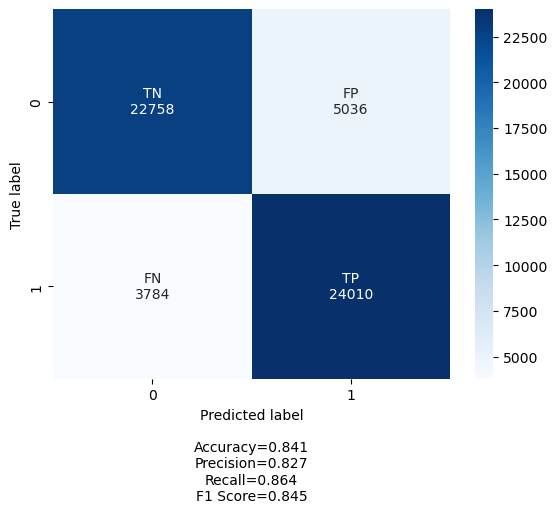

In [57]:
labels = ['TN','FP','FN','TP']
categories = ["0", "1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [28]:
#df.to_csv('robertadf_upsampled.csv',index=False)

In [29]:
df.head()

,Text,sentiment,label,score,roberta_labels
0,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,Positive,POSITIVE,0.998779,Positive
1,Zip ties!,Positive,POSITIVE,0.984956,Positive
2,Zero sugar options would be nice as well,Positive,NEGATIVE,0.993065,Positive
3,Zendaya by cozz ft. J Cole 🐐,Positive,POSITIVE,0.997752,Positive
4,Zayunmmmm who are these people 🥵😍,Positive,NEGATIVE,0.995552,Positive


In [30]:
df.value_counts('roberta_labels')

roberta_labels
Positive    55588
dtype: int64